# Seção 04 - RNN e Classificação de Textos
### Aluno: Vinícius Trainotti

# Senoidal : Predição de Série Temporal

In [ ]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

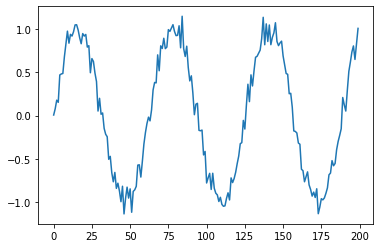

In [ ]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [ ]:
T = 10 # tamanho da janela
D = 1 # quantidade de dados
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


In [ ]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(i)
x = Dense(1)(x)
model = Model(i, x)

In [ ]:
model.compile(
loss="mse",
optimizer=Adam(learning_rate=0.1)
)

In [ ]:
r = model.fit(
X[:-N//2], Y[:-N//2],
epochs=80,
validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 2s 187ms/step - loss: 0.2755 - val_loss: 0.0561
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0556 - val_loss: 0.0245
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0420 - val_loss: 0.0453
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0563 - val_loss: 0.0465
Epoch 5/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0474 - val_loss: 0.0450
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0478 - val_loss: 0.0281
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0482 - val_loss: 0.0256
Epoch 8/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0382 - val_loss: 0.0409
Epoch 9/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0362 - val_loss: 0.0292
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0356 - val_loss: 0.0243
Epoch 11/80
3/3 [===========

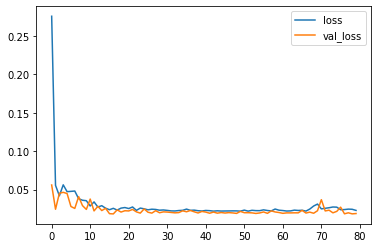

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)

1/1 [==============================] - 0s 24ms/step


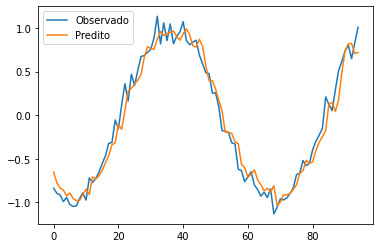

In [ ]:
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

# Passageiros : Predição de Série Temporal

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
tf.__version__

'2.11.0'

--2023-03-25 17:22:45--  http://www.razer.net.br/datasets/airline-passengers.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/csv]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-03-25 17:22:45 (227 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



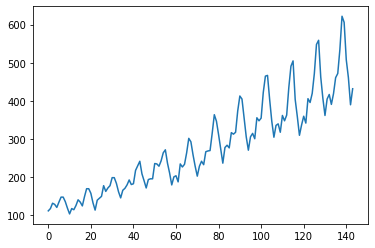

In [ ]:
!wget http://www.razer.net.br/datasets/airline-passengers.csv
df = pd.read_csv("airline-passengers.csv", usecols=[1])
df.head()
plt.plot(df)
plt.show()

In [ ]:
series = df.values
series = series.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series)
# tamanho da base de treino – 67% do total
train_size = int(len(series) * 0.67)

In [ ]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (134, 10, 1)  Y.shape:  (134, 1)


In [ ]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
# x = SimpleRNN(5, activation="relu")(i)
# x = SimpleRNN(5)(i) # tanh por default
x = Dense(1)(x)
model = Model(i, x)

In [ ]:
model.compile(
loss="mse",
optimizer=Adam(learning_rate=0.1)
)
r = model.fit(
X[:train_size], Y[:train_size],
epochs=80,
validation_data=(X[-train_size:], Y[-train_size:])
)

Epoch 1/80
3/3 [==============================] - 1s 113ms/step - loss: 0.3306 - val_loss: 0.0213
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0115 - val_loss: 0.0194
Epoch 3/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0086 - val_loss: 0.0204
Epoch 4/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0459 - val_loss: 0.0124
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0243 - val_loss: 0.0208
Epoch 6/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0123 - val_loss: 0.0229
Epoch 7/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0087
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0077 - val_loss: 0.0112
Epoch 9/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0074 - val_loss: 0.0136
Epoch 10/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0043 - val_loss: 0.0070
Epoch 11/80
3/3 [===========

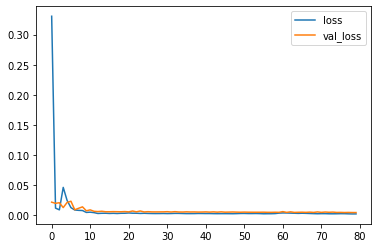

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

1/1 [==============================] - 0s 22ms/step


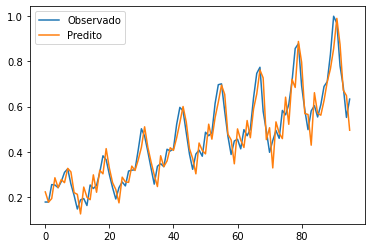

In [ ]:
validation_target = Y[-train_size:]
validation_predictions = []
i = -train_size
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

1/1 [==============================] - 0s 28ms/step


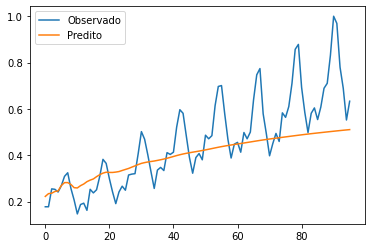

In [ ]:
validation_target = Y[-train_size:]
validation_predictions = []
last_x = X[-train_size]
while len(validation_predictions) < len(validation_target):
  p = model.predict( last_x.reshape(1, -1, 1))[0, 0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

# IMDB : Classificação de reviews

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
tf.__version__

'2.11.0'

In [ ]:
num_words = 20000 # número de palavras
maxlen = 200 # máximo palavras no review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(25000,)

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
print(len(x_train[0]), len(x_train[1]))

218 189


In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
print(len(x_train[0]), len(x_train[1]))

200 200


In [ ]:
x_test = pad_sequences(x_test, maxlen=maxlen)
print(len(x_test[0]), len(x_test[1]))

200 200


In [ ]:
# Construir a RNN
# recebe como entrada maxlen palavras
i = Input(shape=(x_train.shape[1], ))
# com textos precisa da camada de
# - representação numérica das palavras
# num_words palavras e 128 características para representar
# cada palavra (colunas)
# Não tem relação com a quantidade de unidades da LSTM
x = Embedding(input_dim=num_words, output_dim=128)(i)
x = LSTM(units=128, activation="tanh")(x)
x = Dense(units=1, activation="sigmoid")(x)
model = Model(i, x)

In [ ]:
# para RNN melhor rmsprop
model.compile(optimizer="rmsprop", loss="binary_crossentropy",
metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
r = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/10
196/196 [==============================] - 171s 862ms/step - loss: 0.5715 - accuracy: 0.6918
Epoch 2/10
196/196 [==============================] - 167s 851ms/step - loss: 0.3582 - accuracy: 0.8491
Epoch 3/10
196/196 [==============================] - 182s 930ms/step - loss: 0.2951 - accuracy: 0.8830
Epoch 4/10
196/196 [==============================] - 242s 1s/step - loss: 0.2465 - accuracy: 0.9067
Epoch 5/10
196/196 [==============================] - 163s 832ms/step - loss: 0.2118 - accuracy: 0.9191
Epoch 6/10
196/196 [==============================] - 165s 842ms/step - loss: 0.1861 - accuracy: 0.9321
Epoch 7/10
196/196 [==============================] - 169s 864ms/step - loss: 0.1612 - accuracy: 0.9422
Epoch 8/10
196/196 [==============================] - 164s 836ms/step - loss: 0.1385 - accuracy: 0.9500
Epoch 9/10
196/196 [==============================] - 163s 830ms/step - loss: 0.1241 - accuracy: 0.9566
Epoch 10/10
196/196 [==============================] - 161s 821ms/s

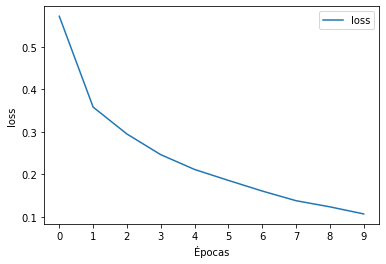

In [ ]:
plt.plot( r.history["loss"], label="loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

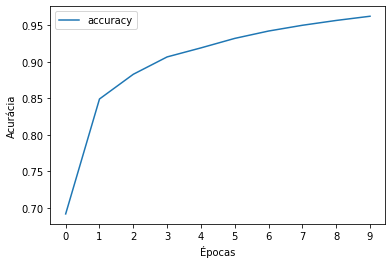

In [ ]:
plt.plot( r.history["accuracy"], label="accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

782/782 [==============================] - 96s 122ms/step - loss: 0.3923 - accuracy: 0.8613
0.8612800240516663


In [ ]:
texto = [[4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766]]
entrada = pad_sequences(texto, 200)
sent = np.round(model.predict(entrada))
print( "Positivo" if sent==1 else "Negativo" )

1/1 [==============================] - 0s 447ms/step
Negativo


# SPAM : Classificação de e-mails

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
!wget http://www.razer.net.br/datasets/spam.csv
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]
df["b_labels"] = df["labels"].map({ "ham": 0, "spam" : 1})
y = df["b_labels"].values

--2023-03-25 17:59:49--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.22MB/s    in 0.4s    

2023-03-25 17:59:50 (1.22 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["data"], y, test_size=0.33)

In [ ]:
# Número máximo de palavras para considerar
# São consideradas as mais frequentes, as demais são
# ignoradas
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s tokens" % V)

7299 tokens


In [ ]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1] # tamanho da sequência
data_test = pad_sequences(sequences_test, maxlen=T)
print("data_train.shape: ", data_train.shape)
print("data_test.shape: ", data_test.shape)

data_train.shape:  (3733, 189)
data_test.shape:  (1839, 189)


In [ ]:
D = 20 # tamanho do embedding, hiperparâmetro que pode ser escolhido
M = 15 # tamanho do hidden state
i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
# x = LSTM(M)(x) # tirar o GlobalMaxPooling1D()
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

In [ ]:
model.compile(
  loss="binary_crossentropy",
  optimizer="adam",
  metrics=["accuracy"]
)
epochs = 10
r = model.fit(
    data_train,
    y_train,
    epochs=epochs,
    validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 15s 106ms/step - loss: 0.4925 - accuracy: 0.8398 - val_loss: 0.3206 - val_accuracy: 0.8608
Epoch 2/10
117/117 [==============================] - 11s 98ms/step - loss: 0.2387 - accuracy: 0.9006 - val_loss: 0.1850 - val_accuracy: 0.9685
Epoch 3/10
117/117 [==============================] - 12s 101ms/step - loss: 0.1324 - accuracy: 0.9829 - val_loss: 0.1174 - val_accuracy: 0.9788
Epoch 4/10
117/117 [==============================] - 12s 101ms/step - loss: 0.0814 - accuracy: 0.9896 - val_loss: 0.0847 - val_accuracy: 0.9826
Epoch 5/10
117/117 [==============================] - 12s 101ms/step - loss: 0.0510 - accuracy: 0.9936 - val_loss: 0.0637 - val_accuracy: 0.9859
Epoch 6/10
117/117 [==============================] - 12s 104ms/step - loss: 0.0323 - accuracy: 0.9968 - val_loss: 0.0677 - val_accuracy: 0.9853
Epoch 7/10
117/117 [==============================] - 12s 106ms/step - loss: 0.0229 - accuracy: 0.9987 - val_loss: 0.0797 - val_acc

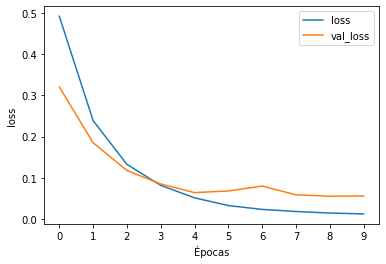

In [ ]:
plt.plot( r.history["loss"], label="loss")
plt.plot( r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

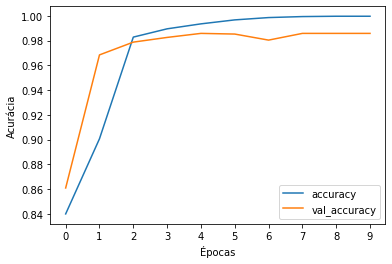

In [ ]:
plt.plot( r.history["accuracy"], label="accuracy")
plt.plot( r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [ ]:
texto = "Before I introduce myself <escreva um texto aqui> "
seq_texto = tokenizer.texts_to_sequences([texto])
data_texto = pad_sequences(seq_texto, maxlen=T)
pred = model.predict(data_texto)
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")

1/1 [==============================] - 1s 617ms/step
[[0.00539593]]
OK


# Shakespeare: Geração de texto

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
# Leitura do texto
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# Tamanho do texto em número de caracteres
print(f'Tamanho do texto: {len(text)} caracteres')
# Primeiros 250 caracteres do texto
print(text[:250])
# Caracteres únicos
vocab = sorted(set(text))
print(f'{len(vocab)} caracters únicos')

1115394/1115394 [==============================] - 0s 0us/step
Tamanho do texto: 1115394 caracteres
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

65 caracters únicos


In [ ]:
# Processamento do texto
# Converte um caractere em um ID único
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
# Faz o contrário, converte os IDs em caracteres
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
# Função onde, dado uma lista de IDs, gera o texto
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [ ]:
# Gerar base de treino
# Exemplo : Para a palagra "Hello"
# Suponha seq_length = 4
# Então: Entrada "Hell" e Saída "ello"
# Tem que dividir o texto em pedaços de tamanho seq_length+1
# from_tensor_slices - cria um dataset com os dados
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)
# Converte as sequências no tamanho desejado : seq_length+1
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
# Função onde, dado uma sequência "Hello", gera entrada e saída: "Hell" e "ello"
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text
# dataset contém as sequências contendo entrada e saída
dataset = sequences.map(split_input_target)
# Criar lotes de treinamento
# Batch size
BATCH_SIZE = 64
# Tamanho do buffer para randomizar o dataset
BUFFER_SIZE = 10000
dataset = (
dataset
  .shuffle(BUFFER_SIZE)
  .batch(BATCH_SIZE, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
# Construir o modelo
# Tamanho do vocabulário em número de caracteres
vocab_size = len(vocab)
# Dimensão do Embedding
embedding_dim = 256
# Número de unidades RNN
rnn_units = 1024

In [ ]:
# Classe que gera o modelo: Embedding -> GRU -> Dense
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                  return_sequences=True,
                                  return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)
  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)
    if return_state:
      return x, states
    else:
      return x

In [ ]:
# Criação do modelo
model = MyModel(
# Be sure the vocabulary size matches the `StringLookup` layers.
vocab_size=len(ids_from_chars.get_vocabulary()),
embedding_dim=embedding_dim,
rnn_units=rnn_units)

In [ ]:
# Função de perda é sparse_categorical_crossentropy
# Modelo retorna Logits, sinaliza from_logits
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
# Compila o modelo
model.compile(optimizer='adam', loss=loss)
# Treinar
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/20
172/172 [==============================] - 896s 5s/step - loss: 2.7199
Epoch 2/20
172/172 [==============================] - 872s 5s/step - loss: 1.9857
Epoch 3/20
172/172 [==============================] - 872s 5s/step - loss: 1.7065
Epoch 4/20
172/172 [==============================] - 924s 5s/step - loss: 1.5469
Epoch 5/20
172/172 [==============================] - 924s 5s/step - loss: 1.4499
Epoch 6/20
172/172 [==============================] - 875s 5s/step - loss: 1.3826
Epoch 7/20
172/172 [==============================] - 872s 5s/step - loss: 1.3302
Epoch 8/20
172/172 [==============================] - 947s 5s/step - loss: 1.2869
Epoch 9/20
172/172 [==============================] - 963s 6s/step - loss: 1.2460
Epoch 10/20
172/172 [==============================] - 931s 5s/step - loss: 1.2069
Epoch 11/20
172/172 [==============================] - 932s 5s/step - loss: 1.1685
Epoch 12/20
172/172 [==============================] - 919s 5s/step - loss: 1.1277
Epoch 13/20
1

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars
    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)
  
  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()
    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
    return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask
    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)
    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)
    # Return the characters and model state.
    return predicted_chars, states

In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)
# Executar em um laço para gera o texto
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]
for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)
result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
There's comfort. It was wont to come upon the city?

POMPEY:
If your misery hearing of my lands and goods are rid, forgive;
More than our brother with laments boast.

HORTENSIO:
Fear you not well your worship is done away?

ANGELO:
Yet leave the king at scarce:
The season body in the day he will unmurder?
Then, fellow and me, as I do bending death:
Wherein these first hath dineded but by the dost,
And, by the reason, did it be so lean,
Scarious in to those that shall I do,
He were request your state. Fight upon you, lords,
May show all forsook hearing that he would not,
Yet doth we have here behind, me once
receive King Henry's use our lights upon this?
O that offer here, this shipts starts forricle!
Duke mightily being waste: hath seen him spead,
What duty the meanest faint unto Vincentio of death,
The Volsces flood at Pembroke: if he
swears, hot like a trank. O gentle village,
O cup of uncell'd sorrow's empoiced; and hirstes
Let forth more still lives from me the case.

KING R